# Credit Card Fraud Detection

## Problem Statement:- 
The problem statement chosen for this project is to predict
fraudulent credit card transactions with the help of machine learning models.
In this project, you will analyse customer-level data which has been collected and analysed
during a research collaboration of Worldline and the Machine Learning Group.

## Business Problem Overview:- 
For many banks, retaining high profitable customers is
the number one business goal. Banking fraud, however, poses a significant threat to this goal
for different banks. In terms of substantial financial losses, trust and credibility, this is a
concerning issue to both banks and customers alike.

## Understanding and Defining Fraud:- 
Credit card fraud is any dishonest act and
behaviour to obtain information without the proper authorization from the account holder for
financial gain. Among different ways of frauds, Skimming is the most common one, which is
the way of duplicating information located on the magnetic strip of the card. Apart from this,
the other ways are:
- Manipulation/alteration of genuine cards
- Creation of counterfeit cards
- Stolen/lost credit cards
- Fraudulent telemarketing

## Roadmap for the Case Study:

- Data Upload & Import Libraries
- EDA
- Data Treatment
- Model Building
- Model Selection
- Conclusion

## Let's import the required Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
from collections import Counter
import seaborn as sn

# SMOTE & ADASYN
from imblearn.over_sampling import SMOTE

from imblearn.over_sampling import ADASYN 

# # plot functions

from pandas.plotting import scatter_matrix
from collections import Counter

import matplotlib.pyplot as plt
import scikitplot as skplt

# scikit packages
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import PowerTransformer
from sklearn import metrics
from sklearn import preprocessing

# XG-Boost packages
import xgboost as xgb
from xgboost import XGBClassifier

## Data Upload

In [2]:
# Let's load our dataframe "creditcard"

df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Exploratory Data Analysis

Let's get an understanding of our dataset.

In [3]:
# Let's observe the different feature type present in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

#### Observation:

- Time, Amount & 28 PCA transformed variable (to maintain confidentiality)
- No missing values

Text(0, 0.5, 'Frequency')

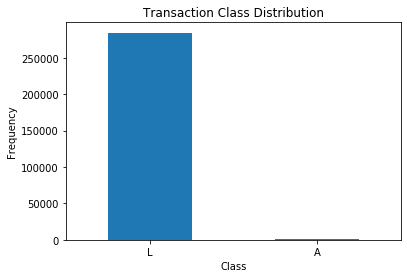

In [4]:
# Let's look at the class distribution in our dataset

classes_count = pd.value_counts(df['Class'], sort = True)

classes_count.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), "LABELS")

plt.xlabel("Class")

plt.ylabel("Frequency")

From the above plot we can see that minority class Fraudulent transactions are present in our dataset.

In [5]:
# Let's categorize the Frauds & Good Transactions from our DataFrame and look at it's the shape

frauds = df[df.Class == 1]
good = df[df.Class == 0]

print(frauds.shape,good.shape)

(492, 31) (284315, 31)


### Amount

Let's look deeper into it!

In [6]:
# Let's get to understand how different are the amount of money used in fraud transactions
frauds.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [7]:
# Let's get to understand how different are the amount of money used in good transactions
good.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

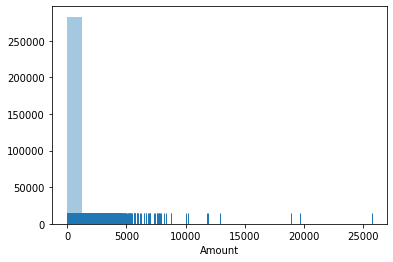

In [8]:
# Let's view the distribution of "Amount" variable in our dataframe

sns.distplot(df.Amount, bins=20, kde=False, rug=True)

Observation:
Majorly transaction amount varies between 0 to 10000.

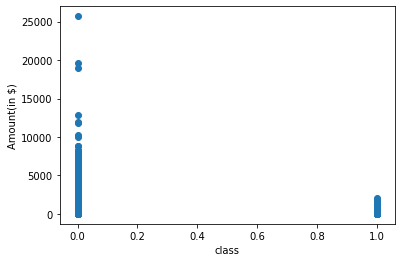

In [9]:
# Let's create a scatter plot to observe the distribution of classes with Amount
plt.scatter(df.Class,df.Amount)
plt.xlabel('class')
plt.ylabel('Amount(in $)')
plt.show()

Observation:
From the above scatter plot we can observe major portion of our dataframe belong to Good Transactions.

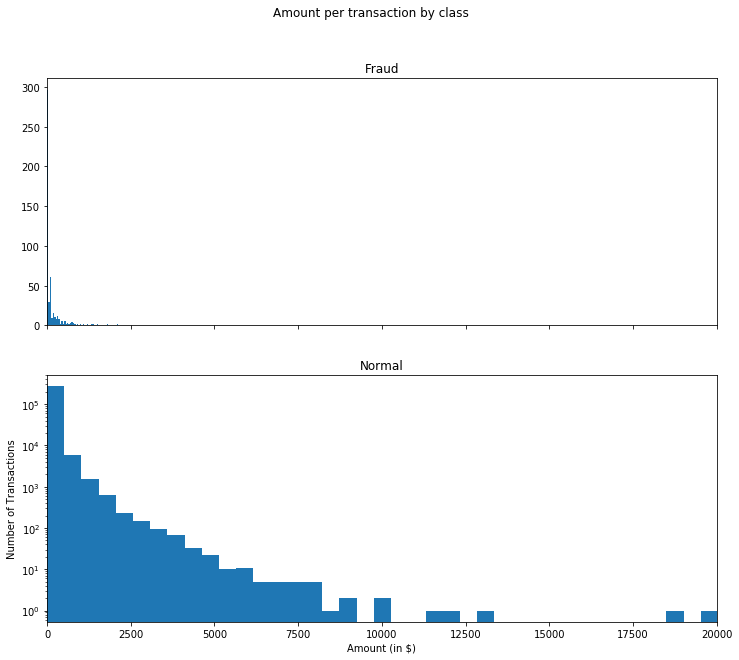

In [10]:
# Let's look how the transaction Amount varies for Good & Fraud Transactions

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True,figsize=(12,10))
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(frauds.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(good.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount (in $)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.xlim((0, 20000))
plt.show();

#### Observation:
- Fraud transactions,few no. of transactions (amount of transaction ranging under 1250).
- Good transactions, large no. of transactions (amount of transaction ranging under 10000).

## Time

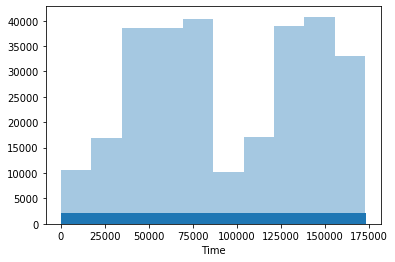

In [11]:
# Let's view the distribution of "Time" variable
sns.distplot(df.Time, bins=10, kde=False, rug=True)

Observation: The "Time" variable indicates the interval between two subsequent transactions and not the "Actual Time" of the transaction. So, it would be helpful in model building. Also maximum no. of transactions happen between the interval 70000 to 80000 and 145000 to 155000. 

### Let's exploring the distribuition by Class types throught hours

In [12]:
# Let's get Time as hours
timedelta = pd.to_timedelta(df['Time'], unit='s')
df['Time_min'] = (timedelta.dt.components.minutes).astype(int)
df['Time_hour'] = (timedelta.dt.components.hours).astype(int)

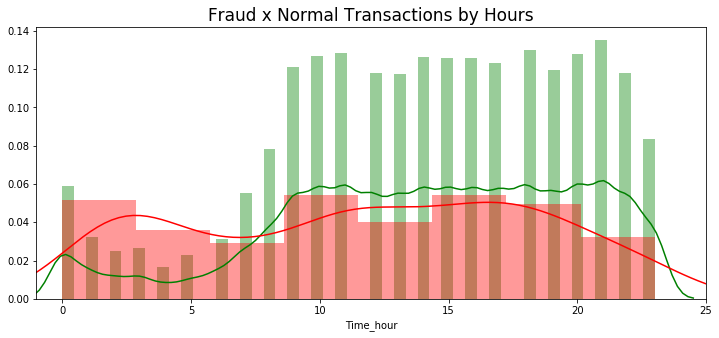

In [13]:
# Let's plot Fraud & Normal transactions based on Hours

plt.figure(figsize=(12,5))
sns.distplot(df[df['Class'] == 0]["Time_hour"], 
             color='g')
sns.distplot(df[df['Class'] == 1]["Time_hour"], 
             color='r')
plt.title('Fraud x Normal Transactions by Hours', fontsize=17)
plt.xlim([-1,25])
plt.show()

Observation: Fraud transactions within less number of hours compared with the good transactions.

### Let's look a scatter plot of the Time_hour distribuition by Amount

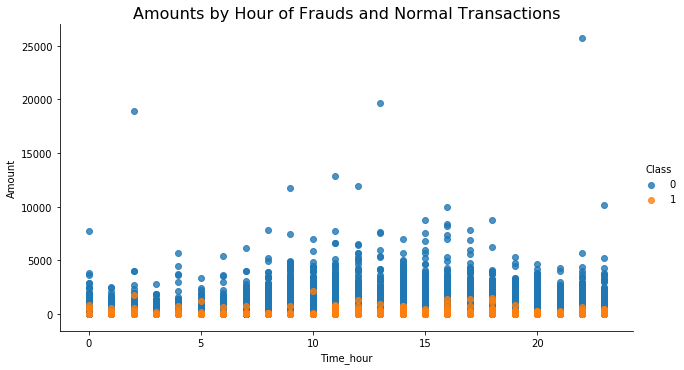

In [14]:
ax = sns.lmplot(y="Amount", x="Time_hour", fit_reg=False,aspect=1.8,
                data=df, hue='Class')
plt.title("Amounts by Hour of Frauds and Normal Transactions", fontsize=16)

plt.show()

#### Observation:

- For fraud transactions, the amount of transactions are lower (within 5000) and is evenly distributed throughout hours.
- For good transactions, the amount of transactions are higher (upto 25000) and is distributed throughout hours.

## Data Treatment

In [15]:
# As mentioned "Time" variable is not the actual time of the transaction. Hence, let's drop "Time" as it will 
# not be helpful in model building
df = df.drop(['Time'], axis=1)

In [16]:
# Let's scale our continous variable "Amount" 

from sklearn.preprocessing import StandardScaler

df['Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))

In [17]:
# Let's check again the "Amount" variable
df.Amount.describe()

count    2.848070e+05
mean     3.202236e-16
std      1.000002e+00
min     -3.532294e-01
25%     -3.308401e-01
50%     -2.652715e-01
75%     -4.471707e-02
max      1.023622e+02
Name: Amount, dtype: float64

Observation: The above statistics shows that after scaling the Amount variable, no outliers are present.

### Splitting the DataFrame into Train & Test

As the data is imbalanced and very few frauds are mentioned, so to tackle this we will use "Strtified K-fold Train Test Split".

- Preserves same ratio of frauds and good transaction even after split.
- Larger amount of data is available for Train and Test

In [18]:
y= df['Class']
X = df.drop(['Class'], axis = 1)

In [19]:
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold


skf = StratifiedKFold(n_splits=3, random_state=5, shuffle=True)
skf.get_n_splits(X, y)
for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[list(train_index)], X.iloc[list(test_index)]
    y_train, y_test = y.iloc[list(train_index)], y.iloc[list(test_index)]

TRAIN: [     0      1      3 ... 284802 284803 284804] TEST: [     2      9     11 ... 284801 284805 284806]
TRAIN: [     0      1      2 ... 284803 284805 284806] TEST: [     3      5      7 ... 284798 284802 284804]
TRAIN: [     2      3      5 ... 284804 284805 284806] TEST: [     0      1      4 ... 284796 284800 284803]


##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [20]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
328
164


### Skewness Test

#### Plotting the distribution of a variable to check the skewness

In [21]:
X_train.skew(axis=0)

V1           -3.152063
V2           -4.192070
V3           -2.353379
V4            0.675919
V5           -3.391754
V6            2.146707
V7            3.815923
V8           -9.121785
V9            0.553804
V10           1.073506
V11           0.392040
V12          -2.410575
V13           0.066271
V14          -2.102659
V15          -0.312175
V16          -1.185073
V17          -4.213476
V18          -0.278450
V19           0.096028
V20          -2.388591
V21           3.454711
V22          -0.200976
V23          -3.483203
V24          -0.559163
V25          -0.382717
V26           0.572977
V27          -0.645989
V28           7.166433
Amount       17.941118
Time_min      0.024914
Time_hour    -0.490631
dtype: float64

Observation: From the above values we can see that few of our values are positively skewed. As it contains both positive and negative values, we will use "Yeo Johnson" or "PowerTransformation" which is capable to handle both the cases.

In [22]:
%matplotlib notebook

Populating the interactive namespace from numpy and matplotlib


C:\Users\samfr\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


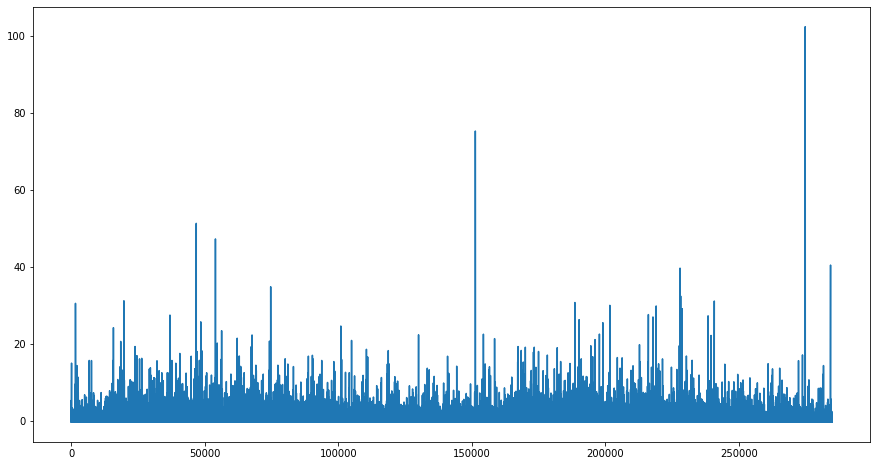

In [23]:
#Here we can see that amount is highly skewed towards right. Let's check that
%pylab inline
figsize(15,8)
plt.plot(X_train['Amount'])

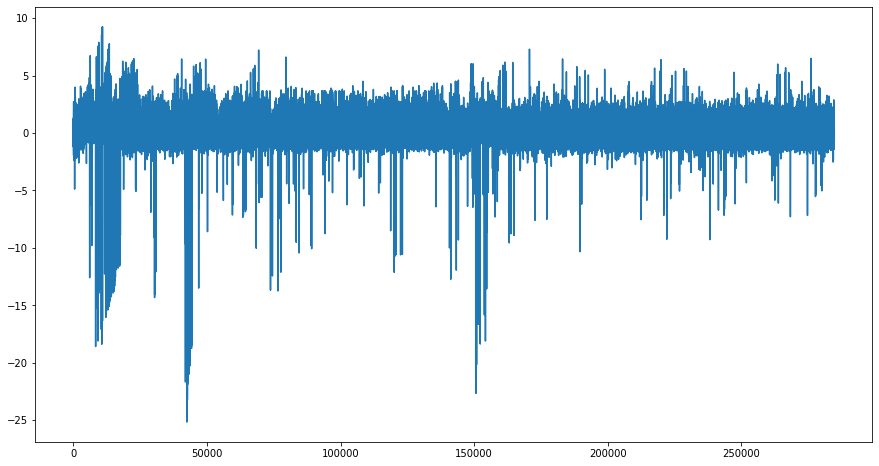

In [24]:
#Now let's take a look at left side skewed Data
plt.plot(X_train['V17'])

### If there is skewness present in the distribution we will use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [26]:
pt = PowerTransformer()
pt.fit(X_train)                       ## Fit the PT on training data
X_train_pt = pt.transform(X_train)    ## Then apply on all data
X_test_pt = pt.transform(X_test)

Now our X_train & X_test have been transformed and skewness has been treated,

## Data Imbalance

As our data is highly imbalanced, let's treat them using the below:

- SMOTE
- ADASYN

## SMOTE

In [45]:
sm = SMOTE(random_state=12)
X_train_res, y_train_res = sm.fit_sample(X_train_pt, y_train)

In [46]:
print("After handling the imbalance, counts of label '1': {}".format(sum(y_train_res==1)))

After handling the imbalance, counts of label '1': 189544


## ADASYN

In [28]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train_pt, y_train)

In [47]:
print("After handling the imbalance, counts of label '1': {}".format(sum(y_train_adasyn==1)))

After handling the imbalance, counts of label '1': 189552


## Model Building

We will build <b>Logistic Regression</b>, <b>Random forest</b></b> & <b>XG-Boost</b> models on the below data:

- Imbalanced Data
- SMOTE transformed Data
- ADASYN transformed Data

#### Hyperparameter Tuning is performed on the <b>Random forest</b></b> & <b>XG-Boost</b> Models on the below data.
- SMOTE transformed Data
- ADASYN transformed Data

### Model Building
- Imbalanced dataset

### Train Models

Let's train our below models

In [106]:
# Train LogisticRegression Model
LGR_Classifier = LogisticRegression()
LGR_Classifier.fit(X_train_pt, y_train);

# Train Random Forest Model
RDF_Classifier = RandomForestClassifier(random_state=0)
RDF_Classifier.fit(X_train_pt, y_train);
# Train XG Boost Model
XGB_Classifier = XGBClassifier()
XGB_Classifier.fit(X_train_pt, y_train);

### Evaluate Models

Let's evaluate our model on Train Data

In [107]:
# Evaluate models
modlist = [('RandomForest Classifier', RDF_Classifier),('LogisticRegression', LGR_Classifier), ("XG-Boost",XGB_Classifier)] 

models = [j for j in modlist]

print()
print('========================== Model Evaluation Results ========================' "\n")  

for i, v in models:
    scores = cross_val_score(v, X_train_pt, y_train, cv=10)
    accuracy = metrics.accuracy_score(y_train, v.predict(X_train_pt))
    confusion_matrix = metrics.confusion_matrix(y_train, v.predict(X_train_pt))
    classification = metrics.classification_report(y_train, v.predict(X_train_pt))
    print('===== {} ====='.format(i))
    print()
    print ("Cross Validation Mean Score: ", '{}%'.format(np.round(scores.mean(), 3) * 100))  
    print() 
    print ("Model Accuracy: ", '{}%'.format(np.round(accuracy, 3) * 100)) 
    print()
    print("Confusion Matrix:" "\n", confusion_matrix)
    print()
    print("Classification Report:" "\n", classification) 
    print()


========================== Model Evaluation Results ========================

===== RandomForest Classifier =====

Cross Validation Mean Score:  99.9%

Model Accuracy:  100.0%

Confusion Matrix:
 [[189544      0]
 [     0    328]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    189544
           1       1.00      1.00      1.00       328

    accuracy                           1.00    189872
   macro avg       1.00      1.00      1.00    189872
weighted avg       1.00      1.00      1.00    189872


===== LogisticRegression =====

Cross Validation Mean Score:  99.9%

Model Accuracy:  99.9%

Confusion Matrix:
 [[189517     27]
 [   111    217]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    189544
           1       0.89      0.66      0.76       328

    accuracy                           1.00    189872
   macro avg       0.94  

### Test Models

Let's evaluate our model performance on Test Data


========================== Model Test Results ========================

=== RandomForest Classifier ===
Model Accuracy:  100.0%

Confusion Matrix:
 [[94760    11]
 [   35   129]]


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     94771
           1       0.92      0.79      0.85       164

    accuracy                           1.00     94935
   macro avg       0.96      0.89      0.92     94935
weighted avg       1.00      1.00      1.00     94935


=== LogisticRegression ===
Model Accuracy:  99.9%

Confusion Matrix:
 [[94755    16]
 [   67    97]]


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     94771
           1       0.86      0.59      0.70       164

    accuracy                           1.00     94935
   macro avg       0.93      0.80      0.85     94935
weighted avg       1.00      1.00      1.00     94935


=== XG-Boos

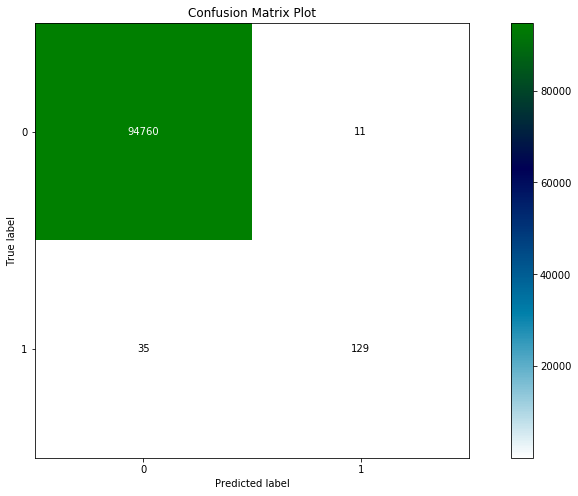

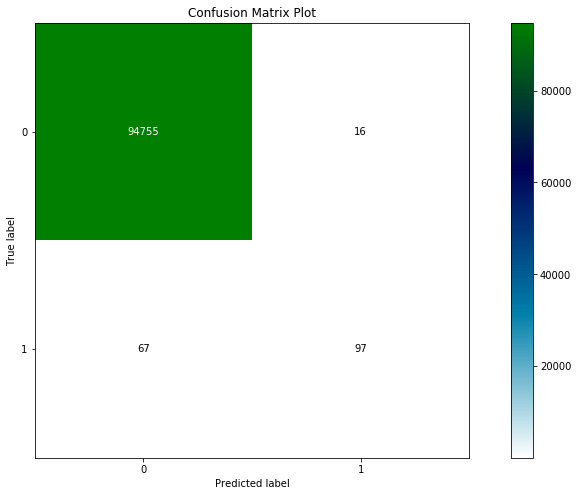

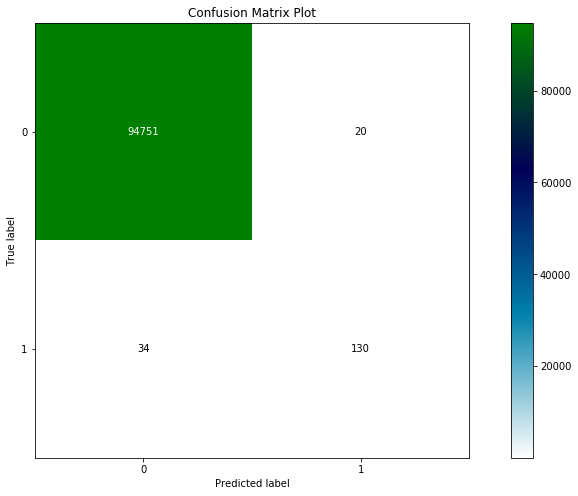

In [109]:
# Test models

classdict = {'normal':0, 'fraudulent':1}
print()
print('========================== Model Test Results ========================' "\n")   

for i, v in models:
    accuracy = metrics.accuracy_score(y_test, v.predict(X_test_pt))
    confusion_matrix = metrics.confusion_matrix(y_test, v.predict(X_test_pt))
    classification = metrics.classification_report(y_test, v.predict(X_test_pt))   
    print('=== {} ==='.format(i))
    print ("Model Accuracy: ",  '{}%'.format(np.round(accuracy, 3) * 100))
    print()
    print("Confusion Matrix:" "\n", confusion_matrix)
    print()
    skplt.metrics.plot_confusion_matrix(y_test, v.predict(X_test_pt),title='Confusion Matrix Plot', cmap=plt.cm.ocean_r)
    print() 
    print("Classification Report:" "\n", classification) 
    print() 

============================= ROC Curve - Logistic Regression, Random Forest & XGB_Classifier ===============================



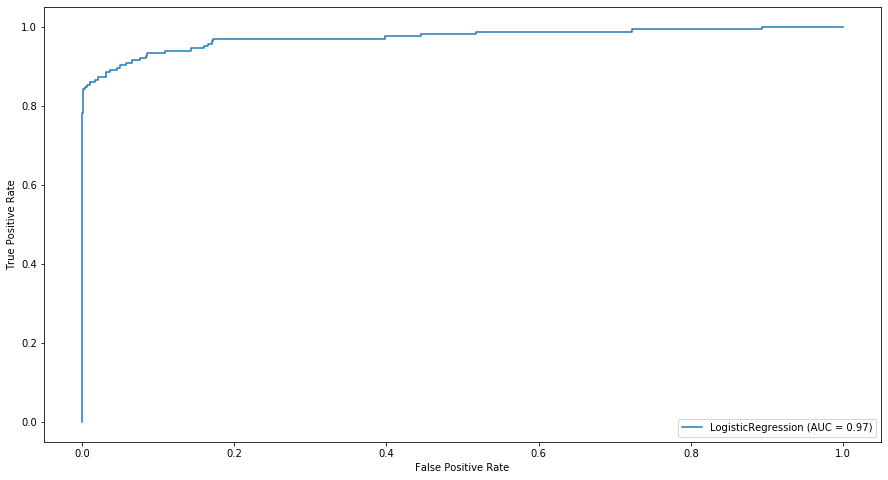

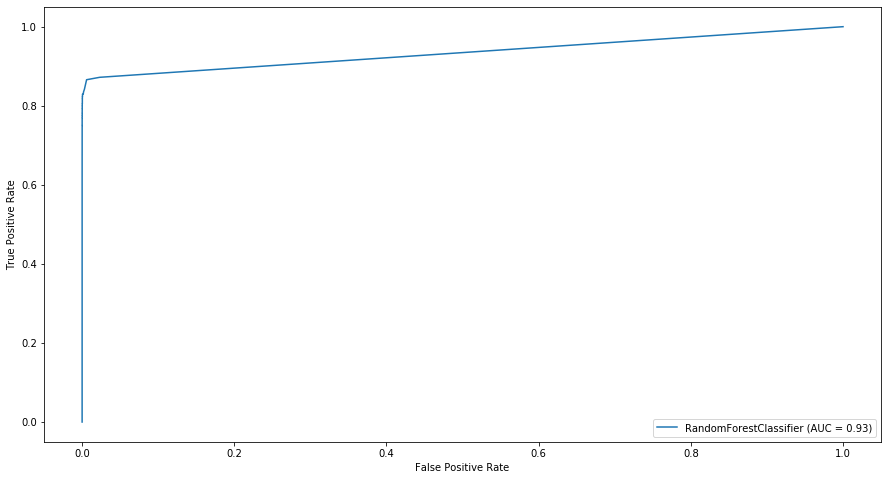

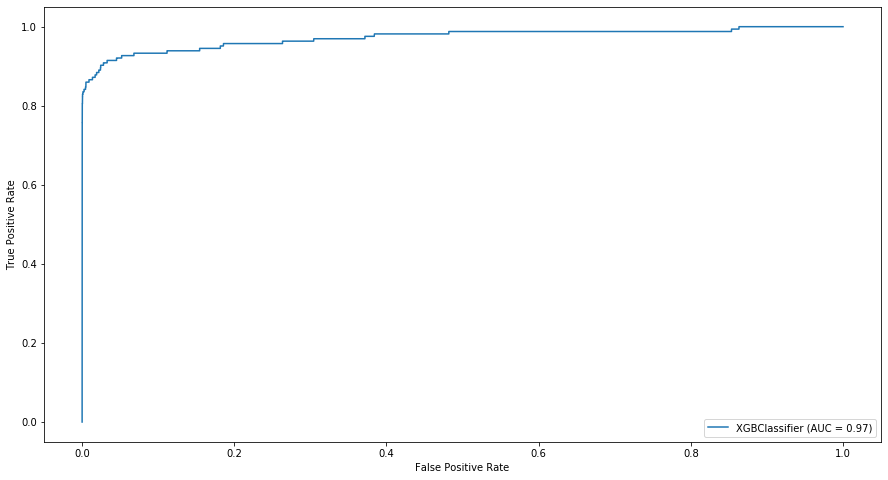

In [110]:
# Let's print the ROC Curve

print('============================= ROC Curve - Logistic Regression, Random Forest & XGB_Classifier ===============================' "\n")      
metrics.plot_roc_curve(estimator=LGR_Classifier, X=X_test_pt, y=y_test)

metrics.plot_roc_curve(estimator=RDF_Classifier, X=X_test_pt, y=y_test)

metrics.plot_roc_curve(estimator=XGB_Classifier, X=X_test_pt, y=y_test)

Observation: From the above ROC curves we can see that our models are doing a good job in identifying the frauds. Also, best being XG-Boost. However we will try more models and checvk the performance.

### Model Performance - Imbalanced Data

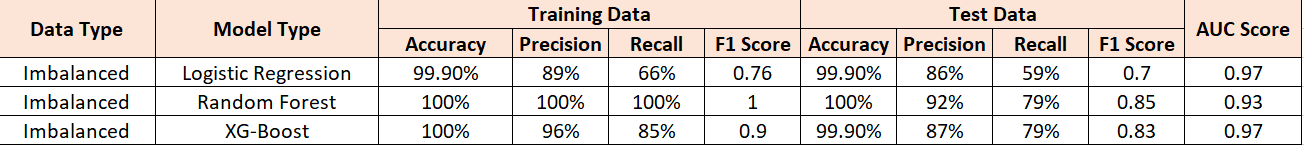

### OBSERVATION:

From the above mentioned models build on Imbalanced Data we can see that the best model amomg then is Random Forest as it has a Recall of 79 % (able to detect 79% frauds) and Precision of 92% (able to detect 92% good transactions). However, we will try handling the data imbalance with SMOTE and ADASYN and build the model again to get the best model.

After Random Forest, XG-Boost is also doing a good job with Recall of 79% on Test Data.

Also, Logistic Regression doesn't seem to be doing very good job in detecting fraud with Recall of 59% on Test Data.

## Model Building  
- Using SMOTE transformed dataset

### Train Models

Let's train the below models

In [111]:
# Train LogisticRegression Model
LGR_Classifier = LogisticRegression()
LGR_Classifier.fit(X_train_res, y_train_res);

# Train Decision Tree Model
RDF_Classifier = RandomForestClassifier(random_state=0)
RDF_Classifier.fit(X_train_res, y_train_res);

# Train XG Boost Model
XGB_Classifier = XGBClassifier()
XGB_Classifier.fit(X_train_res, y_train_res);

### Evaluate Models
Let's evaluate our model with training data

In [112]:

# Evaluate models
modlist = [('RandomForest Classifier', RDF_Classifier),('LogisticRegression', LGR_Classifier), ("XG-Boost",XGB_Classifier)] 

models = [j for j in modlist]

print()
print('========================== Model Evaluation Results ========================' "\n")  

for i, w in models:
    scores = cross_val_score(w, X_train_res, y_train_res, cv=10)
    accuracy = metrics.accuracy_score(y_train_res, w.predict(X_train_res))
    confusion_matrix = metrics.confusion_matrix(y_train_res, w.predict(X_train_res))
    classification = metrics.classification_report(y_train_res, w.predict(X_train_res))
    print('===== {} ====='.format(i))
    print()
    print ("Cross Validation Mean Score: ", '{}%'.format(np.round(scores.mean(), 3) * 100))  
    print() 
    print ("Model Accuracy: ", '{}%'.format(np.round(accuracy, 3) * 100)) 
    print()
    print("Confusion Matrix:" "\n", confusion_matrix)
    print()
    print("Classification Report:" "\n", classification) 
    print()


========================== Model Evaluation Results ========================

===== RandomForest Classifier =====

Cross Validation Mean Score:  100.0%

Model Accuracy:  100.0%

Confusion Matrix:
 [[189544      0]
 [     0 189544]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    189544
           1       1.00      1.00      1.00    189544

    accuracy                           1.00    379088
   macro avg       1.00      1.00      1.00    379088
weighted avg       1.00      1.00      1.00    379088


===== LogisticRegression =====

Cross Validation Mean Score:  95.3%

Model Accuracy:  95.7%

Confusion Matrix:
 [[184809   4735]
 [ 11669 177875]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96    189544
           1       0.97      0.94      0.96    189544

    accuracy                           0.96    379088
   macro avg       0.96 

### Test Models

Let's evaluate our model performance using test dataset


========================== Model Test Results ========================

=== RandomForest Classifier ===
Model Accuracy:  99.9%

Confusion Matrix:
 [[94750    21]
 [   32   132]]


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     94771
           1       0.86      0.80      0.83       164

    accuracy                           1.00     94935
   macro avg       0.93      0.90      0.92     94935
weighted avg       1.00      1.00      1.00     94935


=== LogisticRegression ===
Model Accuracy:  97.5%

Confusion Matrix:
 [[92419  2352]
 [   18   146]]


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     94771
           1       0.06      0.89      0.11       164

    accuracy                           0.98     94935
   macro avg       0.53      0.93      0.55     94935
weighted avg       1.00      0.98      0.99     94935


=== XG-Boost

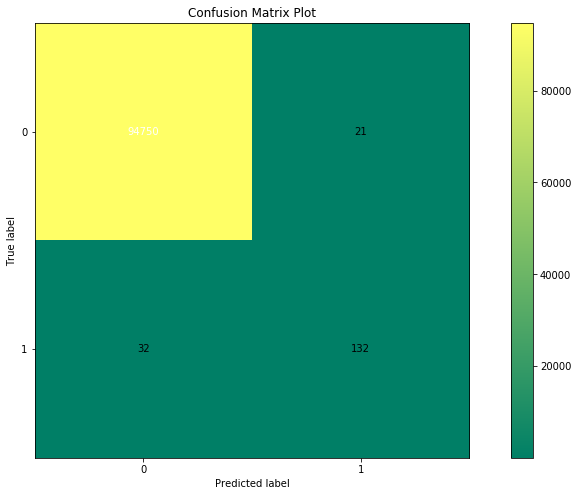

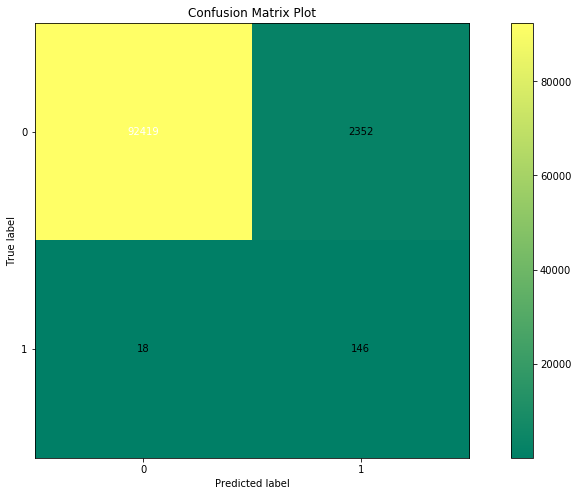

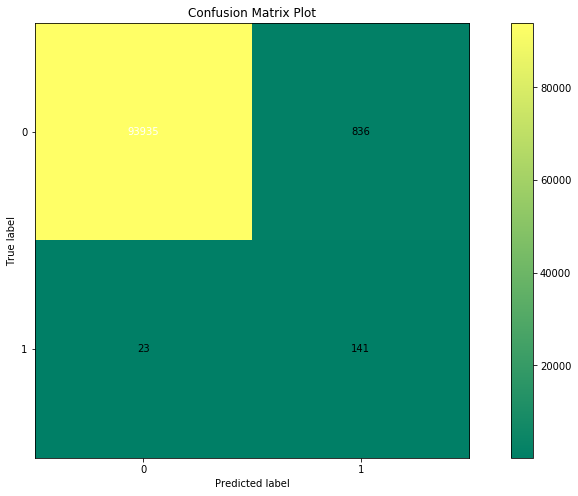

In [113]:
# Test models

import matplotlib.pyplot as plt
import scikitplot as skplt

classdict = {'normal':0, 'fraudulent':1}
print()
print('========================== Model Test Results ========================' "\n")   

for i, w in models:
    accuracy = metrics.accuracy_score(y_test, w.predict(X_test_pt))
    confusion_matrix = metrics.confusion_matrix(y_test, w.predict(X_test_pt))
    classification = metrics.classification_report(y_test, w.predict(X_test_pt))   
    print('=== {} ==='.format(i))
    print ("Model Accuracy: ",  '{}%'.format(np.round(accuracy, 3) * 100))
    print()
    print("Confusion Matrix:" "\n", confusion_matrix)
    print()
    skplt.metrics.plot_confusion_matrix(y_test, w.predict(X_test_pt),title='Confusion Matrix Plot', cmap=plt.cm.summer)
    print() 
    print("Classification Report:" "\n", classification) 
    print() 

============================= ROC Curve - Logistic Regression , Random Forest & XG Boost  ===============================



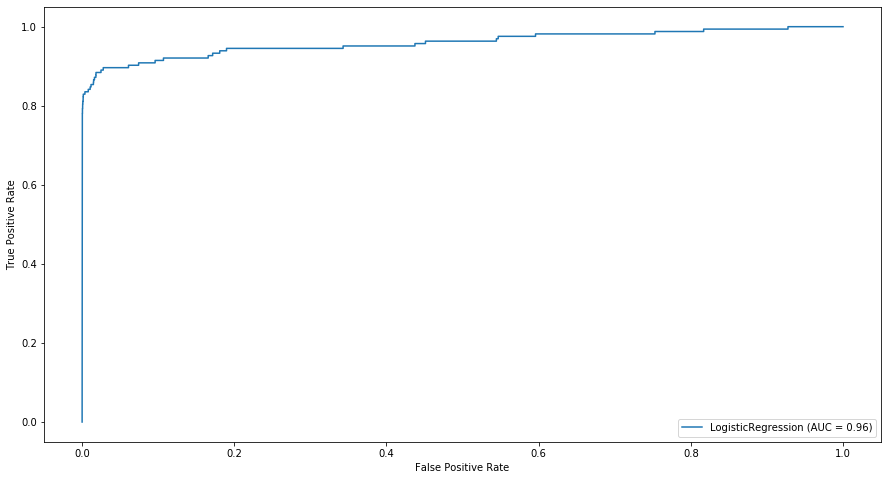

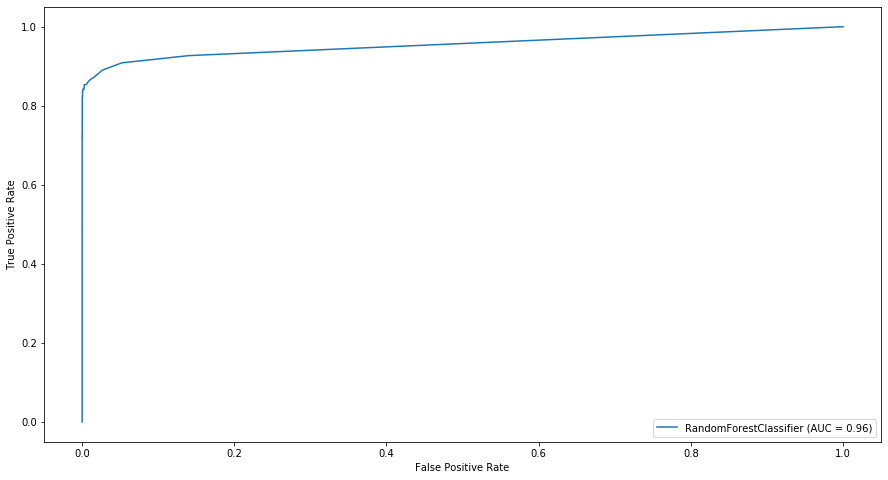

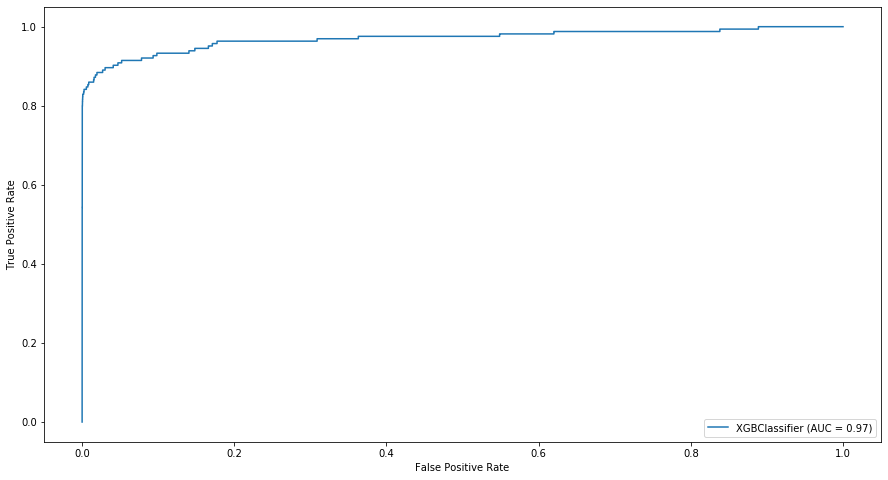

In [114]:
# Let's plot the ROC curve

print('============================= ROC Curve - Logistic Regression , Random Forest & XG Boost  ===============================' "\n")      
metrics.plot_roc_curve(estimator=LGR_Classifier, X=X_test_pt, y=y_test)

metrics.plot_roc_curve(estimator=RDF_Classifier, X=X_test_pt, y=y_test)

metrics.plot_roc_curve(estimator=XGB_Classifier, X=X_test_pt, y=y_test)

Observation: From the above ROC curves we can see that our models are doing a good job in identifying the frauds. Also, best being XG-Boost. However we will try more models and checvk the performance.

## Hyper Parameter Tuning (Random Forest Model)

Let's perform Hyper Parameter tuning using Grid Search CV to identify the best parameters.

In [122]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [123]:
# Fit the grid search to the data
grid_search.fit(X_train_res, y_train_res)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 21.2min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 205.1min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 238.6min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [124]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9908912905776935 using {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}


In [125]:
# Let's build the model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100,min_samples_split=200,
                             max_features=10,n_estimators=200)

In [126]:
# Let's fit our dataset
rfc.fit(X_train_res, y_train_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [127]:
# Let's perform the predictions on the X_test_pt
predictions = rfc.predict(X_test_pt)

accuracy:
 0.990951703797335

Confusion Matrix:
 [[94545   226]
 [   24   140]]

classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     94771
           1       0.38      0.85      0.53       164

    accuracy                           1.00     94935
   macro avg       0.69      0.93      0.76     94935
weighted avg       1.00      1.00      1.00     94935



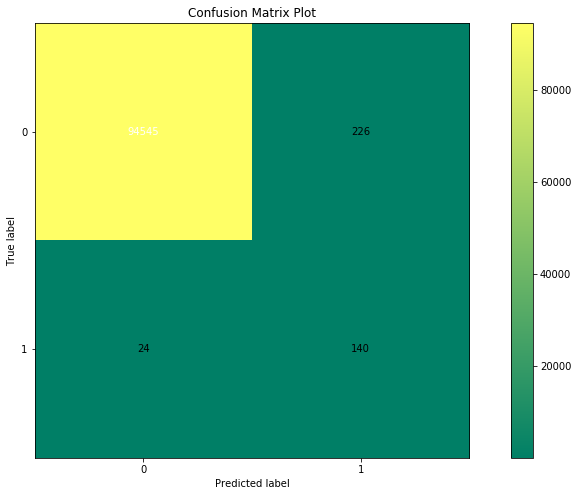

In [146]:
# Let's print the classification_report(y_test,predictions)
accuracy = metrics.accuracy_score(y_test, w.predict(X_test_pt))
confusion_matrix = metrics.confusion_matrix(y_test, predictions)
classification = metrics.classification_report(y_test, predictions)
print('accuracy:' "\n", accuracy)
print()
print("Confusion Matrix:" "\n", confusion_matrix)
print()
print("classification_report:" "\n",classification)
skplt.metrics.plot_confusion_matrix(y_test, predictions,title='Confusion Matrix Plot', cmap=plt.cm.summer)

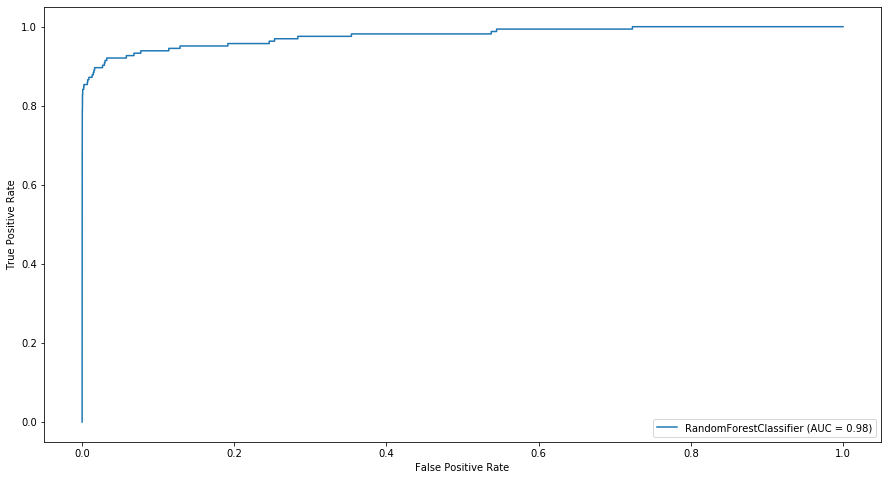

In [147]:
# Let's plot the ROC Curve

metrics.plot_roc_curve(estimator=rfc, X=X_test_pt, y=y_test)

Observation: From the above ROC curve we can see that our models are doing a good job in identifying the frauds. Also, having AUC of 0.98.

### Hyperparameter Tuning for XG Boost

In [56]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
xgb = XGBClassifier()
# Instantiate the grid search model
grid_search_xgb = GridSearchCV(estimator = xgb, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [57]:
# Fit the grid search to the data
grid_search_xgb.fit(X_train_res, y_train_res)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 43.8min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 328.6min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 383.7min finished


[21:04:00] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_features, min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estim...
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, verbosity=None),
             iid='deprecated', n_jobs=-1,
             

In [58]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search_xgb.best_score_,'using',grid_search_xgb.best_params_)

We can get accuracy of 0.9951488706517259 using {'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 100}


In [71]:
# Let's build the model with the best hyperparameters
from sklearn.ensemble import XGBClassifier
xgb = XGBClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100,min_samples_split=200,
                             max_features=5,n_estimators=100)

In [72]:
# Let's fit our dataset
xgb.fit(X_train_res, y_train_res)

[21:29:15] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { bootstrap, max_features, min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', bootstrap=True,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=10, max_features=5,
              min_child_weight=1, min_samples_leaf=100, min_samples_split=200,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1, ...)

In [73]:
# Let's perform the predictions on the X_test_pt
predictions = xgb.predict(X_test_pt)

accuracy:
 0.9993258545320483

Confusion Matrix:
 [[94735    36]
 [   28   136]]

classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     94771
           1       0.79      0.83      0.81       164

    accuracy                           1.00     94935
   macro avg       0.90      0.91      0.90     94935
weighted avg       1.00      1.00      1.00     94935



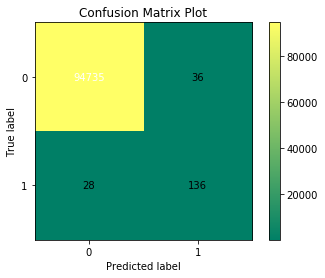

In [74]:
# Let's print the classification_report(y_test,predictions)
accuracy = metrics.accuracy_score(y_test, xgb.predict(X_test_pt))
confusion_matrix = metrics.confusion_matrix(y_test, predictions)
classification = metrics.classification_report(y_test, predictions)
print('accuracy:' "\n", accuracy)
print()
print("Confusion Matrix:" "\n", confusion_matrix)
print()
print("classification_report:" "\n",classification)
skplt.metrics.plot_confusion_matrix(y_test, predictions,title='Confusion Matrix Plot', cmap=plt.cm.summer)

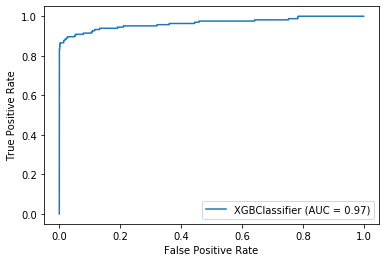

In [76]:
# Let's plot the ROC Curve

metrics.plot_roc_curve(estimator=xgb, X=X_test_pt, y=y_test)

Observation: From the above graph we can observe that the XG-Boost model after hyperparameter tuning gives the AUC of 0.97 and has a good classification performance.

### Model Performance - SMOTE Transformed Data

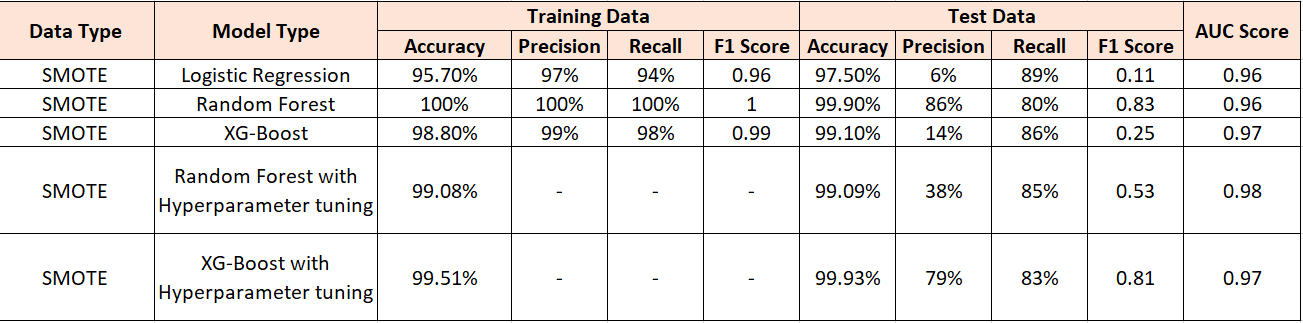

### OBSERVATION:

From the above mentioned models build on SMOTE transformed Data we can see that the best models amomg them are Random Forest having Recall of 80 % (able to detect 80% frauds) & XG-Boost (with Hyperparameter tuning) having Recall of 83 % (able to detect 83% frauds) and having decent Precision value (able to detect good transactions). However, we will try handling the data imbalance with SMOTE and ADASYN and build the model again to get the best model.

Logistic Regression & XG-Boost doesn't seem to be doing very good job as it has high Recall but very low Precision on Test Data. We need a model which has the right trade-off between Precision & Recall so that even the cost doesn't increase due to false Fraud indication.

On the basis of Recall, precision and ROC/AUC we found that XGBOOST (with Hyperparameter tuning) is the best model on the data treated with SMOTE

## ADASYN

### Model Building  
- Using ADASYN transformed dataset

### Train Models

Let's train the below models

In [31]:
# Train LogisticRegression Model
LGR_Classifier = LogisticRegression()
LGR_Classifier.fit(X_train_adasyn, y_train_adasyn);

# Train Decision Tree Model
RDF_Classifier = RandomForestClassifier(random_state=0)
RDF_Classifier.fit(X_train_adasyn, y_train_adasyn);

# Train XG Boost Model
XGB_Classifier = XGBClassifier()
XGB_Classifier.fit(X_train_adasyn, y_train_adasyn);

### Evaluate Models
Let's evaluate our model with training data

In [33]:

# Evaluate models
modlist = [('RandomForest Classifier', RDF_Classifier),('LogisticRegression', LGR_Classifier), ("XG-Boost",XGB_Classifier)] 

models = [j for j in modlist]

print()
print('========================== Model Evaluation Results ========================' "\n")  

for i, p in models:
    scores = cross_val_score(p, X_train_adasyn, y_train_adasyn, cv=10)
    accuracy = metrics.accuracy_score(y_train_adasyn, p.predict(X_train_adasyn))
    confusion_matrix = metrics.confusion_matrix(y_train_adasyn, p.predict(X_train_adasyn))
    classification = metrics.classification_report(y_train_adasyn, p.predict(X_train_adasyn))
    print('===== {} ====='.format(i))
    print()
    print ("Cross Validation Mean Score: ", '{}%'.format(np.round(scores.mean(), 3) * 100))  
    print() 
    print ("Model Accuracy: ", '{}%'.format(np.round(accuracy, 3) * 100)) 
    print()
    print("Confusion Matrix:" "\n", confusion_matrix)
    print()
    print("Classification Report:" "\n", classification) 
    print()


========================== Model Evaluation Results ========================

===== RandomForest Classifier =====

Cross Validation Mean Score:  92.0%

Model Accuracy:  100.0%

Confusion Matrix:
 [[189544      0]
 [     0 189552]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    189544
           1       1.00      1.00      1.00    189552

    accuracy                           1.00    379096
   macro avg       1.00      1.00      1.00    379096
weighted avg       1.00      1.00      1.00    379096


===== LogisticRegression =====

Cross Validation Mean Score:  88.2%

Model Accuracy:  91.8%

Confusion Matrix:
 [[174744  14800]
 [ 16442 173110]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.92    189544
           1       0.92      0.91      0.92    189552

    accuracy                           0.92    379096
   macro avg       0.92  

### Test Models

Let's evaluate our model performance using test dataset


========================== Model Test Results ========================

=== RandomForest Classifier ===
Model Accuracy:  99.9%

Confusion Matrix:
 [[94748    23]
 [   36   128]]


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     94771
           1       0.85      0.78      0.81       164

    accuracy                           1.00     94935
   macro avg       0.92      0.89      0.91     94935
weighted avg       1.00      1.00      1.00     94935


=== LogisticRegression ===
Model Accuracy:  92.30000000000001%

Confusion Matrix:
 [[87490  7281]
 [   15   149]]


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96     94771
           1       0.02      0.91      0.04       164

    accuracy                           0.92     94935
   macro avg       0.51      0.92      0.50     94935
weighted avg       1.00      0.92      0.96     94935



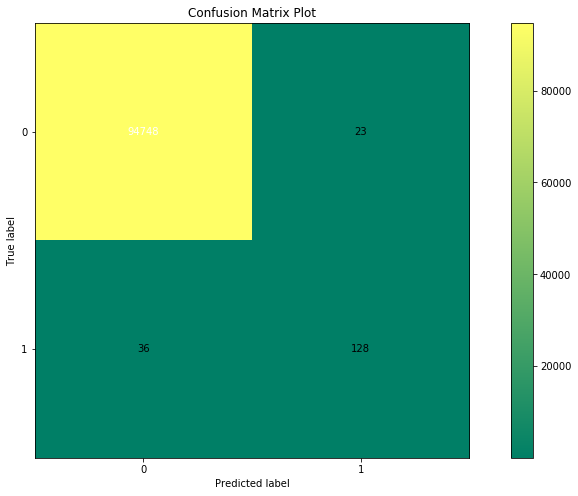

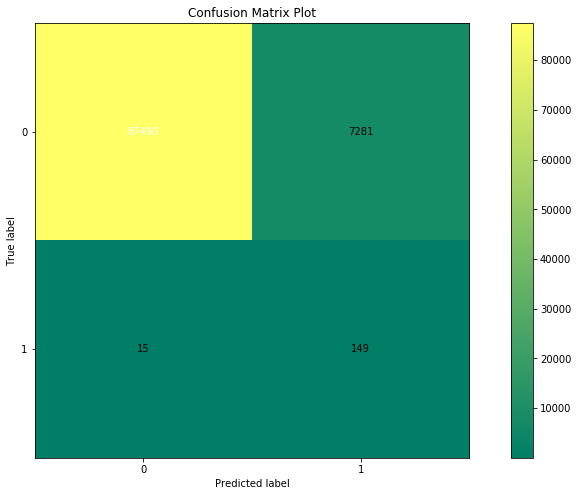

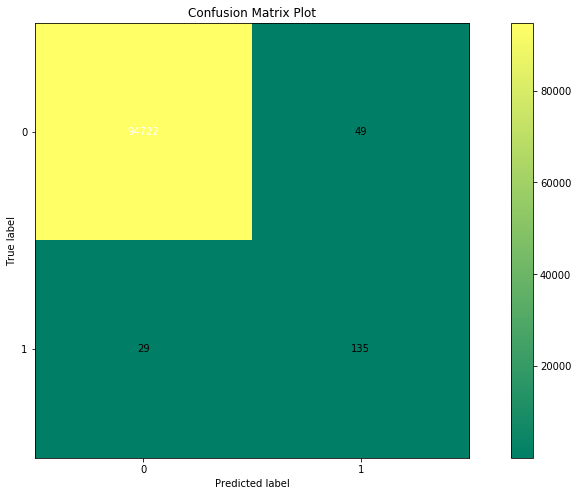

In [34]:
# Test models

import matplotlib.pyplot as plt
import scikitplot as skplt

classdict = {'normal':0, 'fraudulent':1}
print()
print('========================== Model Test Results ========================' "\n")   

for i, p in models:
    accuracy = metrics.accuracy_score(y_test, p.predict(X_test_pt))
    confusion_matrix = metrics.confusion_matrix(y_test, p.predict(X_test_pt))
    classification = metrics.classification_report(y_test, p.predict(X_test_pt))   
    print('=== {} ==='.format(i))
    print ("Model Accuracy: ",  '{}%'.format(np.round(accuracy, 3) * 100))
    print()
    print("Confusion Matrix:" "\n", confusion_matrix)
    print()
    skplt.metrics.plot_confusion_matrix(y_test, p.predict(X_test_pt),title='Confusion Matrix Plot', cmap=plt.cm.summer)
    print() 
    print("Classification Report:" "\n", classification) 
    print() 

============================= ROC Curve - Logistic Regression , Random Forest & XG Boost  ===============================



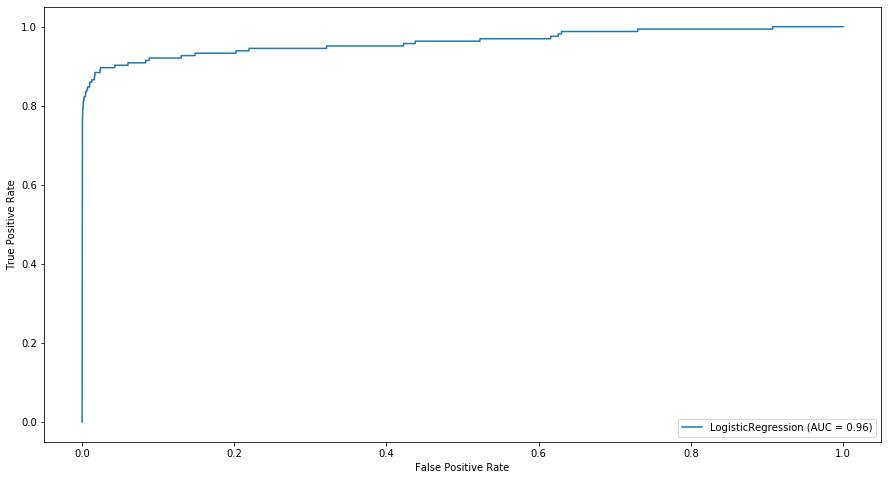

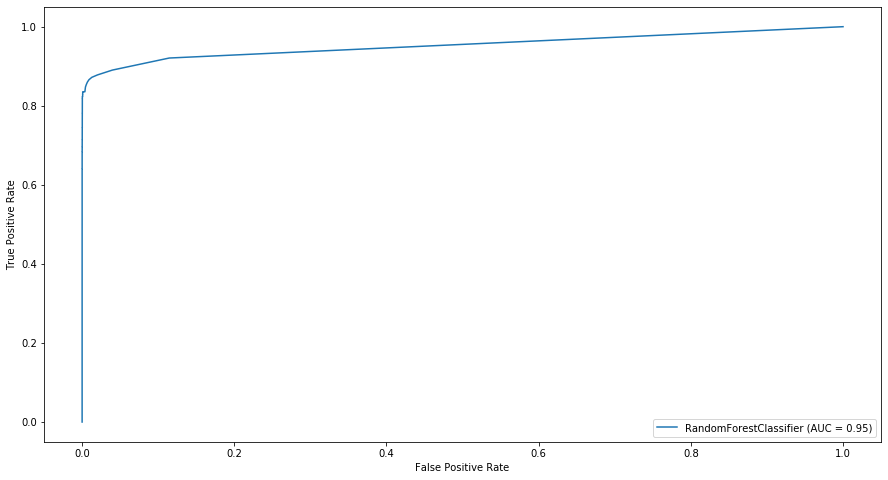

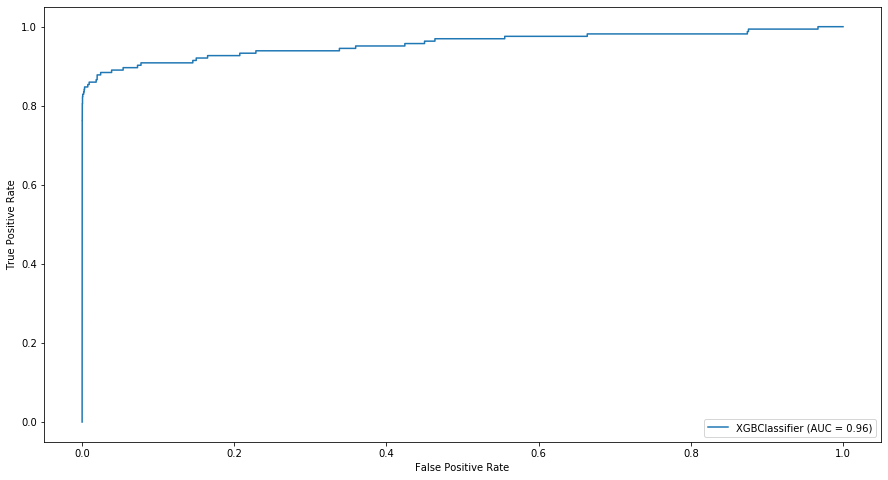

In [35]:
# Let's plot the ROC curve

print('============================= ROC Curve - Logistic Regression , Random Forest & XG Boost  ===============================' "\n")      
metrics.plot_roc_curve(estimator=LGR_Classifier, X=X_test_pt, y=y_test)

metrics.plot_roc_curve(estimator=RDF_Classifier, X=X_test_pt, y=y_test)

metrics.plot_roc_curve(estimator=XGB_Classifier, X=X_test_pt, y=y_test)

to edit


Observation: From the above ROC curves we can see that our models are doing a good job in identifying the frauds. Also, best being XG-Boost. However we will try more models and check the performance.

## Hyper Parameter Tuning (Random Forest Model)

Let's perform Hyper Parameter tuning using Grid Search CV to identify the best parameters.

In [36]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [37]:
# Fit the grid search to the data
grid_search.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 20.2min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 189.7min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 249.0min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [38]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9347843470285339 using {'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 100, 'min_samples_split': 400, 'n_estimators': 100}


In [39]:
# Let's build the model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100,min_samples_split=400,
                             max_features=5,n_estimators=100)

In [40]:
# Let's fit our dataset
rfc.fit(X_train_adasyn, y_train_adasyn)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=400,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [41]:
# Let's perform the predictions on the X_test_pt
predictions = rfc.predict(X_test_pt)

accuracy:
 0.9910254384578923

Confusion Matrix:
 [[93944   827]
 [   25   139]]

classification_report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     94771
           1       0.14      0.85      0.25       164

    accuracy                           0.99     94935
   macro avg       0.57      0.92      0.62     94935
weighted avg       1.00      0.99      0.99     94935



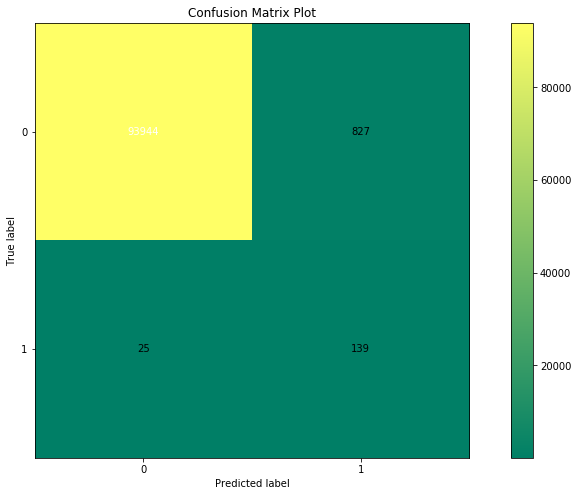

In [42]:
# Let's print the classification_report(y_test,predictions)
accuracy = metrics.accuracy_score(y_test, predictions)
confusion_matrix = metrics.confusion_matrix(y_test, predictions)
classification = metrics.classification_report(y_test, predictions)
print('accuracy:' "\n", accuracy)
print()
print("Confusion Matrix:" "\n", confusion_matrix)
print()
print("classification_report:" "\n",classification)
skplt.metrics.plot_confusion_matrix(y_test, predictions,title='Confusion Matrix Plot', cmap=plt.cm.summer)

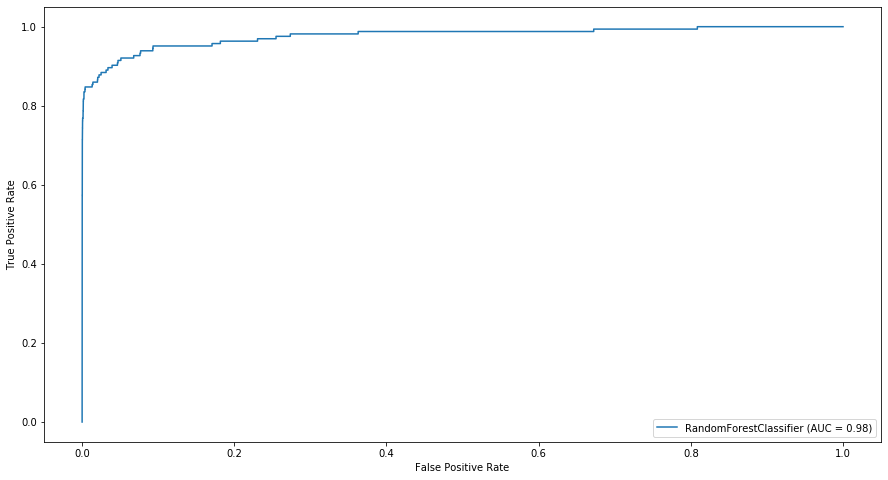

In [43]:
# Let's plot the ROC Curve

metrics.plot_roc_curve(estimator=rfc, X=X_test_pt, y=y_test)

Observation: From the above ROC curve we can see that our models are doing a good job in identifying the frauds. Also, having AUC of 0.98.

### Hyperparameter Tuning for XG Boost

In [48]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
xgb = XGBClassifier()
# Instantiate the grid search model
grid_search_xgb = GridSearchCV(estimator = xgb, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [49]:
# Fit the grid search to the data
grid_search_xgb.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 38.9min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 253.5min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 301.7min finished


[23:42:13] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_features, min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estim...
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, verbosity=None),
             iid='deprecated', n_jobs=-1,
             

In [51]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search_xgb.best_score_,'using',grid_search_xgb.best_params_)

We can get accuracy of 0.9742307930054466 using {'max_depth': 4, 'max_features': 5, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 300}


In [53]:
# Let's build the model with the best hyperparameters
#from sklearn.ensemble import XGBClassifier
xgb = XGBClassifier(bootstrap=True,
                             max_depth=4,
                             min_samples_leaf=100,min_samples_split=200,
                             max_features=5,n_estimators=300)

In [54]:
# Let's fit our dataset
xgb.fit(X_train_adasyn, y_train_adasyn)

[23:48:29] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { bootstrap, max_features, min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', bootstrap=True,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=4, max_features=5, min_child_weight=1,
              min_samples_leaf=100, min_samples_split=200, missing=nan,
              monotone_constraints='()', n_estimators=300, n_jobs=0,
              num_parallel_tree=1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, ...)

In [55]:
# Let's perform the predictions on the X_test_pt
predictions = xgb.predict(X_test_pt)

accuracy:
 0.9993574551008585

Confusion Matrix:
 [[94738    33]
 [   28   136]]

classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     94771
           1       0.80      0.83      0.82       164

    accuracy                           1.00     94935
   macro avg       0.90      0.91      0.91     94935
weighted avg       1.00      1.00      1.00     94935



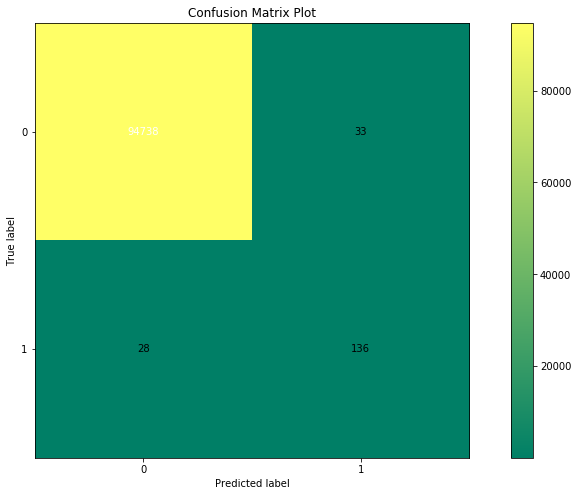

In [56]:
# Let's print the classification_report(y_test,predictions)
accuracy = metrics.accuracy_score(y_test, predictions)
confusion_matrix = metrics.confusion_matrix(y_test, predictions)
classification = metrics.classification_report(y_test, predictions)
print('accuracy:' "\n", accuracy)
print()
print("Confusion Matrix:" "\n", confusion_matrix)
print()
print("classification_report:" "\n",classification)
skplt.metrics.plot_confusion_matrix(y_test, predictions,title='Confusion Matrix Plot', cmap=plt.cm.summer)

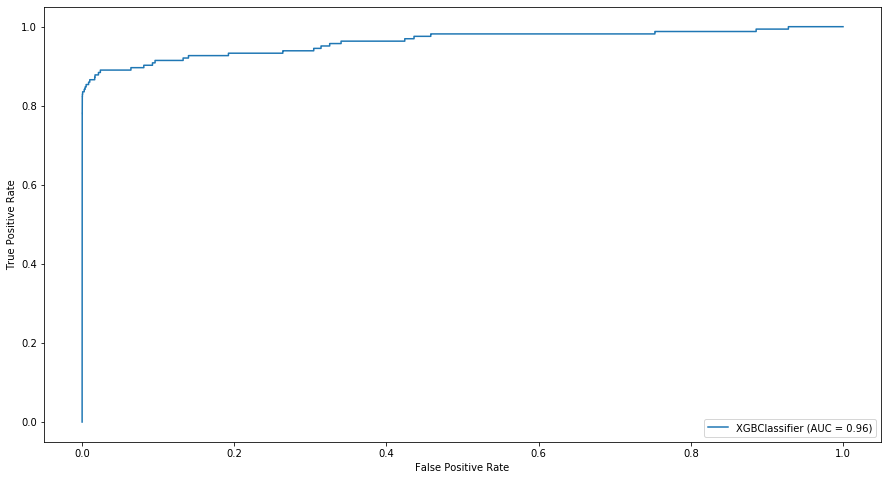

In [57]:
# Let's plot the ROC Curve

metrics.plot_roc_curve(estimator=xgb, X=X_test_pt, y=y_test)

Observation: From the above graph we can observe that the XG-Boost model after hyperparameter tuning gives the AUC of 0.96 and has a good classification performance.

![](DSC_1844.jpg)

![](DSC_1844.jpg)

### Model Performance - ADASYN Transformed Data

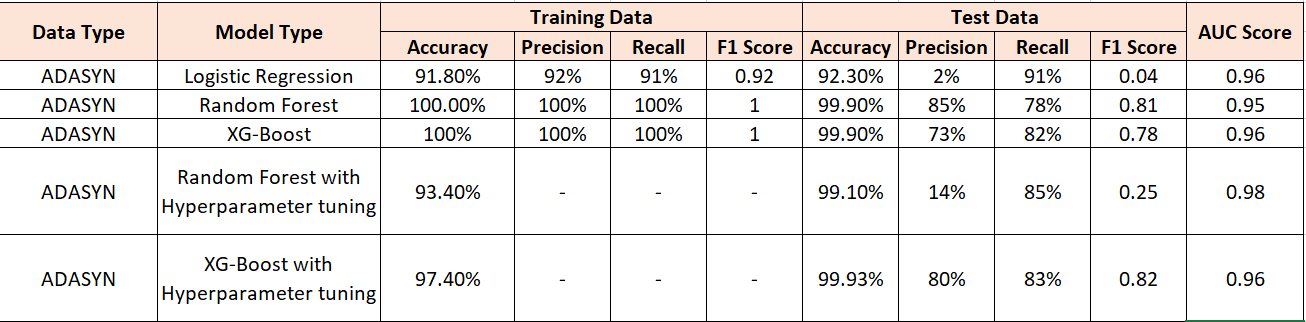

### OBSERVATION:

From the above mentioned models build on ADASYN transformed Data we can see that the best models amomg them is XG-Boost (with Hyperparameter tuning) having Recall of 83 % (able to detect 83% frauds) and Precision of 80% (able to detect 80% good transactions).

After XG-Boost (with Hyperparameter tuning), Random Forest & XG-Boost seems to be doing decent job in detecting Frauds and Good Transactions.

Logistic Regression & Random Forest(with Hyperparameter tuning) doesn't seem to be doing very good job as it has high Recall (91% & 85% respectively) but very low Precision (2% & 14%) on Test Data. We need a model which has the right trade-off between Precision & Recall considering the cost involved.

# Model Selection

Let's look at the performance for all Models build and choose the appropriate as per our goal.

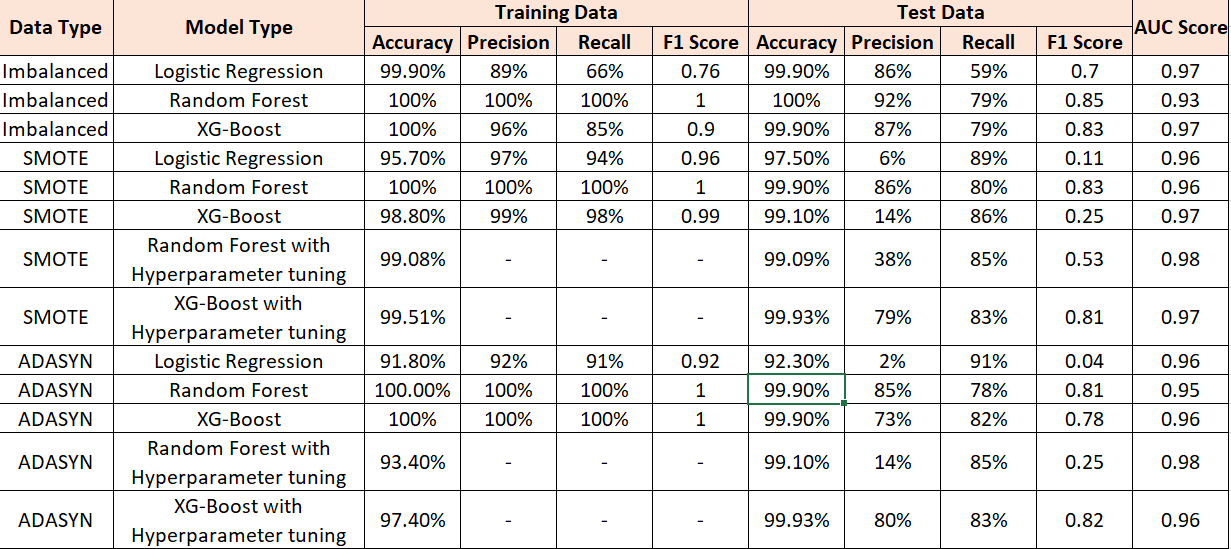

### OBSERVATION:

As we can see the performance of all models, best model is the XG-Boost with Hyperparameter tuning on data treated with ADASYN.
We select our best model on the basis of the following metrics.
 - Recall: 83%
 - Precision: 80%
 - AUC: 0.96

# Conclusion:

As per Nilson report banking frauds would account to $ 30 billion worldwide by 2020.

Our best model have 83 % recall. So we can stop 83 % frauds which accounts $25.2 billion. And there is not much miscallsificaion as model have 80% precision, which helps to reduce cost of employees as human intervention is less.
Less human intervention ensure that customers not get unnecessary messgae/call from bank for regular transaction which helps to retain the customer as well.